# CNNをKerasで構築し、空き家かそうでないかを分類

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

Using TensorFlow backend.


In [2]:
img_width, img_height = 150, 150

train_data_dir = '../data/dataset/train'
validation_data_dir = '../data/dataset/validation'
nb_train_samples = 1830
nb_validation_samples = 820
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [3]:
# Keras Model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 1829 images belonging to 2 classes.
Found 821 images belonging to 2 classes.


In [5]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
114/114 [==============================] - 131s 1s/step - loss: 0.6956 - acc: 0.6223 - val_loss: 0.4198 - val_acc: 0.8787
Epoch 2/50
114/114 [==============================] - 133s 1s/step - loss: 0.4903 - acc: 0.8026 - val_loss: 1.3556 - val_acc: 0.4919
Epoch 3/50
114/114 [==============================] - 126s 1s/step - loss: 0.3385 - acc: 0.8683 - val_loss: 0.4862 - val_acc: 0.8012
Epoch 4/50
114/114 [==============================] - 130s 1s/step - loss: 0.2758 - acc: 0.9041 - val_loss: 0.4474 - val_acc: 0.8534
Epoch 5/50
114/114 [==============================] - 141s 1s/step - loss: 0.2409 - acc: 0.9134 - val_loss: 2.5806 - val_acc: 0.4969
Epoch 6/50
114/114 [==============================] - 140s 1s/step - loss: 0.2312 - acc: 0.9182 - val_loss: 0.9578 - val_acc: 0.7404
Epoch 7/50
114/114 [==============================] - 146s 1s/step - loss: 0.1935 - acc: 0.9369 - val_loss: 1.4074 - val_acc: 0.6870
Epoch 8/50
114/114 [=

In [6]:
model.save_weights('cnn_keras.h5')

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

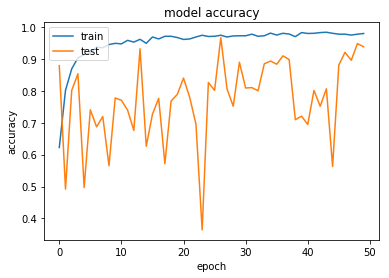

In [8]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

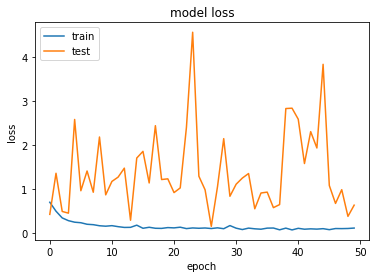

In [9]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()